In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('fsa_indicators_ratios.csv')

In [2]:
print(df.columns)

Index(['geo_name', 'people per km2', 'Average age of the population',
       'Median age of the population', '0 to 4 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years',
       '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
       '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 to 89 years',
       '90 to 94 years', '95 to 99 years', '100 years and over',
       'Single-detached house', 'Semi-detached house', 'Row house',
       'Apartment or flat in a duplex',
       'Apartment in a building that has fewer than five storeys',
       'Apartment in a building that has five or more storeys',
       'Other single-attached house', 'Movable dwelling',
       'Mobility status 1 year ago: Non-movers',
       'Mobility status 1 year ago: Non-migrants',
       'Mobility status 1 year ago: Intraprovincial migrants',
       'Mobility s

In [3]:
print(df.shape)

(1643, 60)


In [4]:
print(df.head())

  geo_name  people per km2  Average age of the population  \
0      A0A        0.000310                       0.522193   
1      A0B        0.000133                       0.637076   
2      A0C        0.000125                       0.626632   
3      A0E        0.000095                       0.584856   
4      A0G        0.000061                       0.613577   

   Median age of the population  0 to 4 years  5 to 9 years  10 to 14 years  \
0                      0.578512      0.033719      0.044291        0.051525   
1                      0.694215      0.026964      0.033446        0.040705   
2                      0.677686      0.025898      0.035505        0.038012   
3                      0.644628      0.029939      0.034418        0.047383   
4                      0.669421      0.028666      0.035720        0.044124   

   15 to 19 years  20 to 24 years  25 to 29 years  ...  $50,000 to $59,999  \
0        0.051413        0.040507        0.035166  ...            0.075625   
1 

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataframe
# Drop non-numeric column (like 'geo_name') if you don't want it to influence clustering
df_cluster = df.drop(columns=['geo_name'])

# Scale the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), columns=df_cluster.columns)

In [6]:
df_scaled = df_scaled.dropna()

c:\Users\jorda\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jorda\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\jorda\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jorda\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

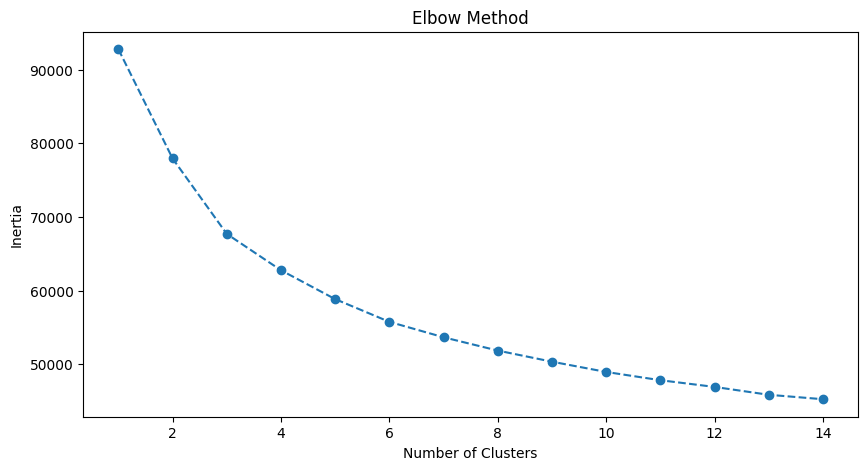

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the number of clusters
inertia = []
for i in range(1, 15):  # example range, can be adjusted
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

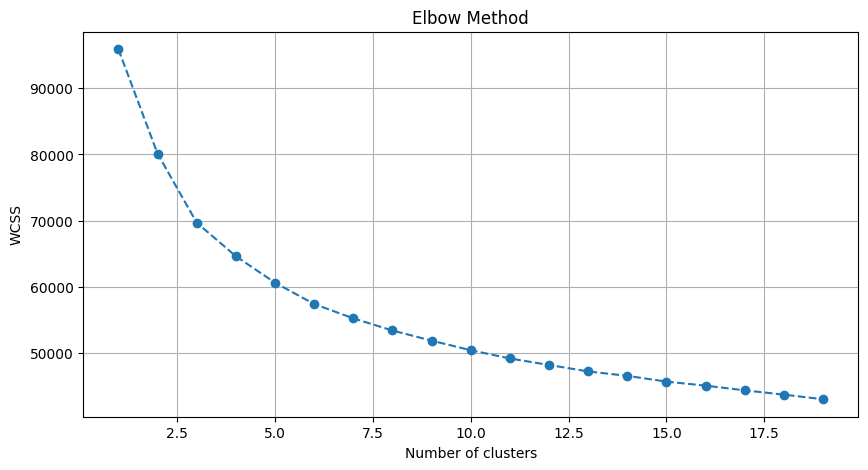

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress the specific UserWarning about memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Drop rows with NaN values
df = df.dropna()

# Select columns for clustering and scaling
features = df.columns[1:]
df_to_scale = df[features]

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_to_scale)

# Use the Elbow method to find a good number of clusters using WCSS (within-cluster sums of squares)
inertia = []

for i in range(1, 20):  # example range, can be adjusted
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

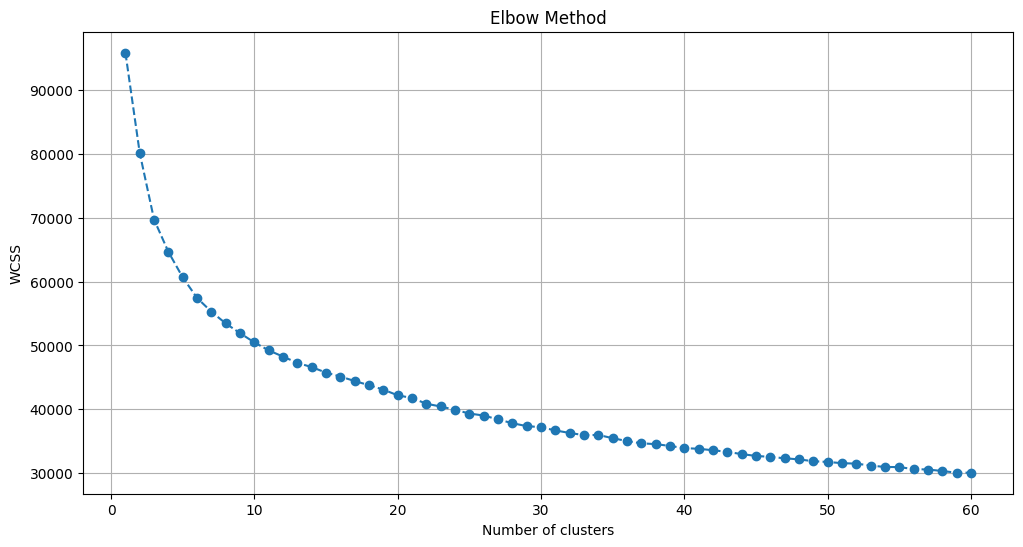

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress the specific UserWarning about memory leak
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Drop rows with NaN values
df = df.dropna()

# Select columns for clustering and scaling
features = df.columns[1:]
df_to_scale = df[features]

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_to_scale)

# Use the Elbow method to find a good number of clusters using WCSS (within-cluster sums of squares)
inertia = []

for i in range(1, 61):  # adjusted range to go up to 60 clusters
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 61), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

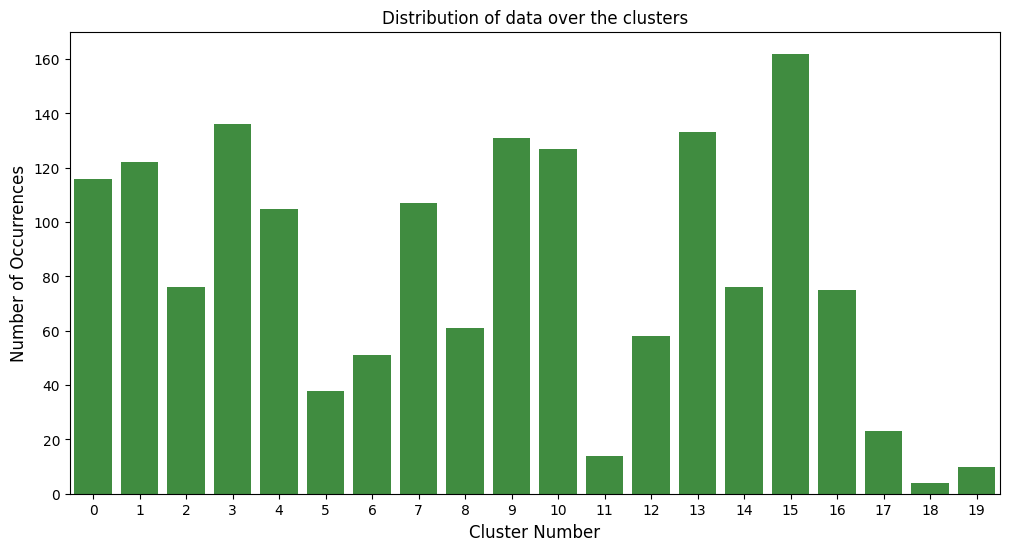

   geo_name  people per km2  Average age of the population  \
20      A1L        0.022087                       0.263708   
26      A1X        0.012478                       0.373368   
76      B2S        0.000499                       0.355091   
78      B2V        0.031151                       0.378590   
85      B3E        0.002131                       0.391645   

    Median age of the population  0 to 4 years  5 to 9 years  10 to 14 years  \
20                      0.297521      0.054007      0.067726        0.074477   
26                      0.388430      0.048291      0.057071        0.064597   
76                      0.388430      0.049313      0.065543        0.063046   
78                      0.404959      0.045306      0.061224        0.064898   
85                      0.429752      0.053634      0.050106        0.057869   

    15 to 19 years  20 to 24 years  25 to 29 years  ...  $60,000 to $69,999  \
20        0.063153        0.057491        0.058798  ...            

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns

# Instantiate the KMeans model with 50 clusters
kmeans = KMeans(n_clusters=20, n_init=10, random_state=42)

# Fit the model
df['cluster'] = kmeans.fit_predict(df_scaled)

# Analyzing the distribution of data over the clusters
cluster_size = df.groupby('cluster').size()
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_size.index, y=cluster_size.values, alpha=0.8, color='g')
plt.title('Distribution of data over the clusters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cluster Number', fontsize=12)
plt.show()

# If you want a deeper dive into specific clusters, you can do something like:
# This will show the first 5 rows of cluster 0, you can replace 0 with any other cluster number to explore
print(df[df['cluster'] == 0].head())


In [11]:
df.to_csv('fsa_K_means_20_clusters.csv', index=False)